In [9]:
# Importing pandas library
import pandas as pd

# Specify the path to your CSV file
file_path = '/Users/cockraml/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Desktop/Python and PhD/Data/DMS/eyelid_open_true.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Calculate the total number of frames
total_frames = len(df)

# Calculate the number of frames where eyes are closed (value is 0)
closed_frames = df['Eyelid Open (int)'].value_counts().get(0, 0)

# Calculate PERCLOS (Percentage of Eye Closure)
perclos_percentage = (closed_frames / total_frames) * 100

print(f"PERCLOS for the entire drive: {perclos_percentage:.2f}%")


PERCLOS for the entire drive: 3.67%


In [11]:
df

,Frame Number,Left Eyelid Closed,Right Eyelid Closed,Eyelid Open (int),Eyelid Open,Timestamp
0,357500,False,False,1,True,11928
1,357501,False,False,1,True,11928
2,357502,False,False,1,True,11928
3,357503,False,False,1,True,11928
4,357504,False,False,1,True,11928
...,...,...,...,...,...,...
4572,362072,False,False,1,True,12080
4573,362073,False,False,1,True,12080
4574,362074,False,False,1,True,12080
4575,362075,False,False,1,True,12080


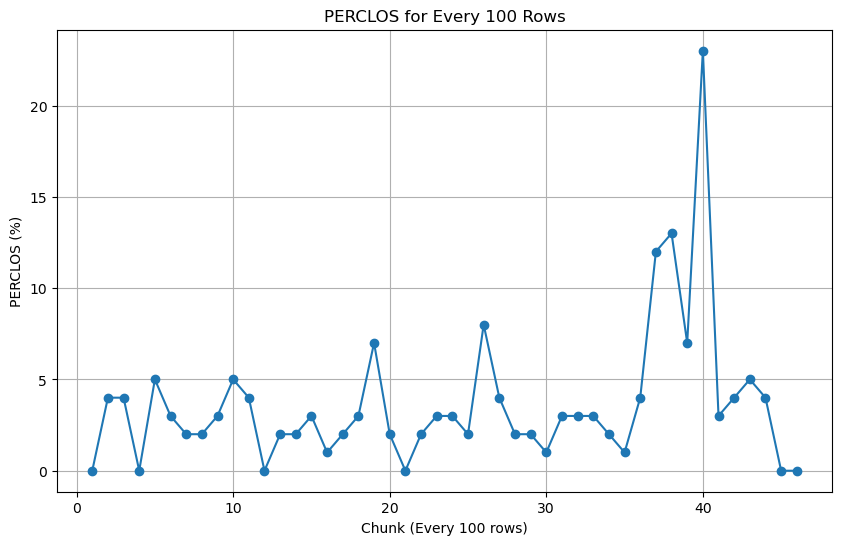

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
file_path = '//Users/cockraml/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Desktop/Python and PhD/Data/DMS/PERCLOS attempt/eyelid_open_true.csv'  # Update this with the correct path

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Calculate PERCLOS for every 100 rows
chunk_size = 100
perclos_values = []

for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i + chunk_size]
    closed_frames = chunk['Eyelid Open (int)'].value_counts().get(0, 0)
    perclos = (closed_frames / chunk_size) * 100
    perclos_values.append(perclos)

# Create a DataFrame for plotting
perclos_df = pd.DataFrame({
    'Chunk': range(1, len(perclos_values) + 1),
    'PERCLOS (%)': perclos_values
})

# Plot the PERCLOS values
plt.figure(figsize=(10, 6))
plt.plot(perclos_df['Chunk'], perclos_df['PERCLOS (%)'], marker='o')
plt.xlabel('Chunk (Every 100 rows)')
plt.ylabel('PERCLOS (%)')
plt.title('PERCLOS for Every 100 Rows')
plt.grid(True)
plt.show()
